

Hello! Let's explore some US bikeshare data!

Which city would you like to explore?
1. Chicago    2. New York    3. Washington

Please choose one of the cities: 1

Would you like to filter the data by month?
If you don't need a filter, please choose "All".
0. All    1. Jan    2. Feb    3. Mar    4.Apr    5. May    6. Jun

Please pick a choice: 0

Would you like to filter the data by day of week?
If you don't need a filter, please choose "All".
0. All    1. Mon    2. Tue    3. Wed    4. Thu    5. Fri    6. Sat    7. Sun

Please pick a choice: 0

Would you like to see the graphical output?
Please type Yes or No: y
----------------------------------------
The statistics of Chicago is listed below.


Calculating The Most Frequent Times of Travel...

Most Frequent Month:  June
Most Frequent Day of Week:  <Bound Method Pandasdelegate._Add_Delegate_Accessors.<Locals>._Create_Delegator_Method.<Locals>.F Of <Pandas.Core.Indexes.Accessors.Datetimeproperties Object At 0X7Ff3750A9A30>>
Most Freq

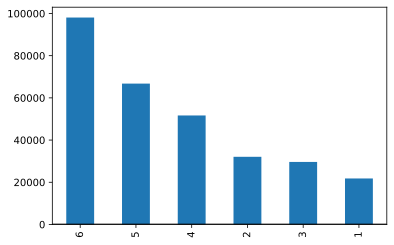

In [3]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

def setup_var(dict, search_value):
    """
    Check if a varaible is equal to the values of a dictionary.
    It can handle the diveristy of users' inputs.

    Return:
        (str) key - the corresponding key of that value
    """
    for key, values in dict.items():
        for value in values:
            if search_value == value:
                return key

def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('\n\nHello! Let\'s explore some US bikeshare data!')
    # TO DO: get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    while True:
        print('\nWhich city would you like to explore?\n1. Chicago    2. New York    3. Washington\n')
        city = input('Please choose one of the cities: ')

        #setup the variable city
        city = city.lower()
        city_dict = {'chicago' : ('1', 'chicago'),
                    'new york city' : ('2', 'new york'),
                    'washington' : ('3', 'washington')}
        city = setup_var(city_dict, city)

        #For invalid input, ask the user to input again
        if city in city_dict.keys():
            break
        else:
            print('\nSorry, invalid input! Please try again.')

    # TO DO: get user input for month (all, january, february, ... , june)
    while True:
        print('\nWould you like to filter the data by month?\nIf you don\'t need a filter, please choose "All".\n0. All    1. Jan    2. Feb    3. Mar    4.Apr    5. May    6. Jun\n')
        month = input('Please pick a choice: ')

        #setup the variable month
        month = month.lower()
        month_dict = {'all' : ('0', 'all'),
                        'january' : ('1', 'jan', 'january'),
                        'february' : ('2', 'feb', 'february'),
                        'march' : ('3', 'mar', 'march'),
                        'april' : ('4', 'apr', 'april'),
                        'may' : ('5', 'may'),
                        'june' : ('6', 'jun', 'june')}
        month = setup_var(month_dict, month)

        #For invalid input, ask the user to input again
        if month in month_dict.keys():
            break
        else:
            print('\nSorry, invalid input! Please try again.')


    # TO DO: get user input for day of week (all, monday, tuesday, ... sunday)
    while True:
        print('\nWould you like to filter the data by day of week?\nIf you don\'t need a filter, please choose "All".\n0. All    1. Mon    2. Tue    3. Wed    4. Thu    5. Fri    6. Sat    7. Sun\n')
        day = input('Please pick a choice: ')

        #setup the variable day
        day = day.lower()
        day_dict = {'all' : ('0', 'all'),
                    'monday' : ('1', 'mon', 'mo', 'monday'),
                    'tuesday' : ('2', 'tue', 'tu', 'tuesday'),
                    'wednesday' : ('3', 'wed', 'we', 'wednesday'),
                    'thursday' : ('4', 'thu', 'th', 'thursday'),
                    'friday' : ('5', 'fri', 'fr', 'friday'),
                    'saturday' : ('6', 'sat', 'sa', 'saturday'),
                    'sunday' : ('7', 'sun', 'su', 'sunday')}
        day = setup_var(day_dict, day)

        #For invalid input, ask the user to input again
        if day in day_dict.keys():
            break
        else:
            print('\nSorry, invalid input! Please try again.')

    #TO DO: get user input for graph (True or False)
    while True:
        graph = input('\nWould you like to see the graphical output?\nPlease type Yes or No: ')
        graph = graph.lower()
        if graph == 'yes' or graph == 'y':
            graph = True
            break
        elif  graph == 'no' or graph == 'n':
            graph = False
            break
        else:
            print('\nSorry, invalid input! Please try again.')

    print('-'*40)
    #print out the user's choixe.
    if month == 'all' and day == 'all':
        print('The statistics of %s is listed below.\n' % city.title() )
    elif month == 'all':
        print('The statistics of {} on every {} is listed below.\n'.format(city.title(), day.title()))
    elif day == 'all':
        print('The statisitcs of {} in {} is listed below.\n'.format(city.title(), month.title()))
    else:
        print('The statistics of {} on evey {} in {} is listed below.\n'.format(city.title(), day.title(), month.title()))
    return city, month, day, graph


def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
    # load data file into a dataframe
    df = pd.read_csv(CITY_DATA[city])

    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # extract month and day of week from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.day_name

    # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1

        # filter by month to create the new dataframe
        df = df[df['month'] == month]

    # filter by day of week if applicable
    if day != 'all':

        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day.title()]

    return df


def time_stats(df, month, day, graph):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    # TO DO: display the most common month
    if month == 'all':
        popular_month = df['month'].mode()[0]
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        print('Most Frequent Month: ', months[popular_month-1].title())




    # TO DO: display the most common day of week
    if day == 'all':
        popular_day = df['day_of_week'].mode()[0]

        print('Most Frequent Day of Week: ', str(popular_day).title())

    # TO DO: display the most common start hour
    df['hour'] =df['Start Time'].dt.hour
    popular_hour = df['hour'].mode()[0]
    print('Most Frequent Start Hour:', popular_hour)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # TO DO: display most commonly used start station
    popular_start_station = df['Start Station'].mode()[0]
    print('Most Frequent Start Station:', popular_start_station)

    # TO DO: display most commonly used end station
    popular_end_station = df['End Station'].mode()[0]
    print('Most Frequent End Station:', popular_end_station)

    # TO DO: display most frequent combination of start station and end station trip
    popular_trip = ('FROM: ' + df['Start Station'] + '    TO: ' + df['End Station']).mode()[0]
    print('Most Frequent Trip: ', popular_trip)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # TO DO: display total travel time
    print('Total travel time: %s hours' % (round(df['Trip Duration'].sum() / 3600, 1)))

    # TO DO: display mean travel time
    print('Mean travel time: %s seconds' % (round(df['Trip Duration'].mean(), 1)))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def user_stats(df, city):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # TO DO: Display counts of user types
    user_types = df['User Type'].value_counts()
    print('Number of {}: {}'.format(user_types.index.values[0], user_types[0]))
    print('Number of {}: {}'.format(user_types.index.values[1], user_types[1]))


    if city != 'washington':
        # TO DO: Display counts of gender
        gender = df['Gender'].value_counts()
        print('')
        print('Number of {}: {}'.format(gender.index.values[0], gender[0]))
        print('Number of {}: {}'.format(gender.index.values[1], gender[1]))

        # TO DO: Display earliest, most recent, and most common year of birth
        print('\nEarliest Year of Birth: ', int(df['Birth Year'].min()))
        print('Most Recent Year of Birth: ', int(df['Birth Year'].max()))
        print('Most Popular Year of Birth: ', int(df['Birth Year'].mode()[0]))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

def view_data(df):
    """
    Display the raw data 5 rows at a time  on request.
    """
    count = 0
    while True:
        display = input('\nWould you like to see the raw data?\nPlease type Yes or No: ')
        display = display.lower()
        if display == 'yes' or display == 'y':
            print(df.iloc[count:count+5,:])
            count += 5
        elif display == 'no' or display == 'n':
            break
        else:
            print('\nSorry, invalid input! Please try again.')


def main():
    while True:
        city, month, day, graph = get_filters()
        df = load_data(city, month, day)

        time_stats(df, month, day, graph)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df, city)
        view_data(df)


        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes' and restart.lower() != 'y':
            break


if __name__ == "__main__":
	main()
